Датасет представляет собой набор имитационных данных о клиентах магазина.
Источник: https://www.kaggle.com/datasets/vetrirah/customer

Атрибуты:
1. ID (int) - уникальный ID;
2. Gender (str) - пол;
3. Ever_Married (str) - человек когда либо был в браке;
4. Age (int) - возраст;
5. Graduated (str) - имеется ли высшее образование;
6. Profession (str) - профессия;
7. Work_Experience (float) - опыт работы;
8. Spending_Score (str) - категория, присваиваемая магазином на основе расходов;
9. Family_Size (float) - количество членов семьи, включая покупателя;
10. Var_1 (str) - анонимная категория для клиента;
11. Segmentation (str) - сегмент, в который попадает покупатель.

Атрибуты Var_1 и Segmentation уберем, так как Var_1 не дает какой-либо
информации, Segmentation - так как данный атрибут не указан в Test.csv.
Целевым классом обозначим Spending_Score.

In [1]:
import pandas as pd

train_df = pd.read_csv('Train.csv')
train_df.drop(['Segmentation'], axis=1, inplace=True)
test_df = pd.read_csv('Test.csv')
data = pd.concat([train_df, test_df], ignore_index=True)
data.shape

(10695, 10)

In [2]:
data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6


In [3]:
data.drop(['ID', 'Var_1'], axis=1, inplace=True)
data.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,Male,No,22,No,Healthcare,1.0,Low,4.0
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0


In [4]:
data.dtypes

Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
dtype: object

In [5]:
data['Work_Experience'] = (pd.to_numeric(data['Work_Experience'], errors='coerce')
    .astype('Int64'))
data['Family_Size'] = (pd.to_numeric(data['Family_Size'], errors='coerce')
    .astype('Int64'))
data.dtypes

Gender             object
Ever_Married       object
Age                 int64
Graduated          object
Profession         object
Work_Experience     Int64
Spending_Score     object
Family_Size         Int64
dtype: object

In [6]:
data.isna().sum()

Gender                0
Ever_Married        190
Age                   0
Graduated           102
Profession          162
Work_Experience    1098
Spending_Score        0
Family_Size         448
dtype: int64

Пустые значения во всех полях, кроме Work_Experience и Family_Size, заполним
с помощью ffill(), так как количество пропущенных значений составляет малую
часть данных. Пустые значения в Work_Experience и Family_Size заменим
медианой, чтобы не поменять вид распределения данных.

In [7]:
data['Ever_Married'].ffill(inplace=True)
data['Profession'].ffill(inplace=True)
data['Graduated'].ffill(inplace=True)
data['Work_Experience'].fillna(data['Work_Experience'].median(), inplace=True)
data['Family_Size'].fillna(data['Family_Size'].median(), inplace=True)
data.isna().sum()

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
dtype: int64

In [8]:
print(f'Rows before cleanup: {len(data)}')
data = data[
    (data['Age'] > data['Work_Experience'])
    & (data['Family_Size'] > 0)
]
print(f'Rows after cleanup: {len(data)}')

Rows before cleanup: 10695
Rows after cleanup: 10695


Применим One-Hot-Encoding для категориальных признаков.

In [9]:
data = pd.concat(
    [
        data,
        pd.get_dummies(data['Gender'], prefix='Gender'),
        pd.get_dummies(data['Ever_Married'], prefix='Ever_Married'),
        pd.get_dummies(data['Graduated'], prefix='Graduated'),
        pd.get_dummies(data['Profession'], prefix='Profession'),
    ],
    axis=1
)
data.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Gender_Female,Gender_Male,...,Graduated_Yes,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
0,Male,No,22,No,Healthcare,1,Low,4,0,1,...,0,0,0,0,0,0,1,0,0,0
1,Female,Yes,38,Yes,Engineer,1,Average,3,1,0,...,1,0,0,1,0,0,0,0,0,0
2,Female,Yes,67,Yes,Engineer,1,Low,1,1,0,...,1,0,0,1,0,0,0,0,0,0
3,Male,Yes,67,Yes,Lawyer,0,High,2,0,1,...,1,0,0,0,0,0,0,0,1,0
4,Female,Yes,40,Yes,Entertainment,1,High,6,1,0,...,1,0,0,0,1,0,0,0,0,0


In [10]:
data.drop(
    [
        'Gender',
        'Ever_Married',
        'Graduated',
        'Profession'
    ],
    axis=1,
    inplace=True
)
data.shape

(10695, 19)

Задачей будет определить Spending_Score покупателя, нас будут интересовать
покупатели со средним и высоким показателем.

In [11]:
spending_score_replace = {'Low': 0, 'Average': 1, 'High': 1}
data['Spending_Score'].replace(spending_score_replace, inplace=True)
data.head()

,Age,Work_Experience,Spending_Score,Family_Size,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
0,22,1,0,4,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0
1,38,1,1,3,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0
2,67,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0
3,67,0,1,2,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0
4,40,1,1,6,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10695 entries, 0 to 10694
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       10695 non-null  int64
 1   Work_Experience           10695 non-null  Int64
 2   Spending_Score            10695 non-null  int64
 3   Family_Size               10695 non-null  Int64
 4   Gender_Female             10695 non-null  uint8
 5   Gender_Male               10695 non-null  uint8
 6   Ever_Married_No           10695 non-null  uint8
 7   Ever_Married_Yes          10695 non-null  uint8
 8   Graduated_No              10695 non-null  uint8
 9   Graduated_Yes             10695 non-null  uint8
 10  Profession_Artist         10695 non-null  uint8
 11  Profession_Doctor         10695 non-null  uint8
 12  Profession_Engineer       10695 non-null  uint8
 13  Profession_Entertainment  10695 non-null  uint8
 14  Profession_Executive      10695 non-nu

In [13]:
y = data['Spending_Score']
x = data.drop('Spending_Score', axis=1)
x.shape, y.shape

((10695, 18), (10695,))

In [14]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [15]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.3,
                                                      random_state=17)
first_tree = DecisionTreeClassifier(random_state=17)
cross_val_score(first_tree, x_train, y_train, cv=5)

array([0.81508678, 0.80227121, 0.82698731, 0.82765531, 0.7989312 ])

In [16]:
import numpy as np

np.mean(cross_val_score(first_tree, x_train, y_train, cv=5))

0.8141863611513191

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
first_knn = KNeighborsClassifier()
np.mean(cross_val_score(first_knn, x_train, y_train, cv=5))

0.8132508898526917

Настроим max_depth и max_features для дерева

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
tree_params = {'max_depth': np.arange(1, 11), 'max_features': [0.5, 0.7, 1.0]}

In [21]:
tree_grid = GridSearchCV(first_tree, tree_params, cv=5, n_jobs=-1)

In [22]:
%%time
tree_grid.fit(x_train, y_train);

CPU times: user 134 ms, sys: 55.6 ms, total: 190 ms
Wall time: 1.35 s


In [23]:
tree_grid.best_params_, tree_grid.best_score_

({'max_depth': 2, 'max_features': 0.7}, 0.8674846800855829)

Лучшим сочетанием параметров оказалось глубина 2 и 70% атрибутов со средней
долей правильных ответов 86.7, что на 5 больше, чем для дерева с настройками по
умолчанию. Теперь будем искать лучшие параметры для алгоритма knn.

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [25]:
knn_pipe = Pipeline(
    [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_jobs=-1))]
)

In [32]:
knn_params = {'knn__n_neighbors': [1, 2, 3, 4] + list(range(50, 100, 10))}

In [33]:
knn_grid = GridSearchCV(knn_pipe, knn_params, cv=5, n_jobs=-1)

In [34]:
%%time
knn_grid.fit(x_train, y_train);

CPU times: user 79.9 ms, sys: 41.9 ms, total: 122 ms
Wall time: 1.75 s


In [35]:
knn_grid.best_params_, knn_grid.best_score_

({'knn__n_neighbors': 3}, 0.838230711534328)

Для алгоритма knn оптимальным количеством соседей оказалось 3 со средней долей
правильных ответов 83.8%. Сравним два алгоритма на отложенной выборке с
помощью различных метрик.

In [36]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score)

In [38]:
print('Доля правильных ответов (accuracy)')
print(f'Дерево: {accuracy_score(y_valid, tree_grid.predict(x_valid))}')
print(f'knn: {accuracy_score(y_valid, knn_grid.predict(x_valid))}')
print(f'Доля клиентов со Spending_Score Average или High: {1 - np.mean(y)}')

Доля правильных ответов (accuracy)
Дерево: 0.869741352446245
knn: 0.854783421626675
Доля клиентов со Spending_Score Average или High: 0.6071996259934549


In [39]:
print('Точность (precision)')
print(f'Дерево: {precision_score(y_valid, tree_grid.predict(x_valid))}')
print(f'knn: {precision_score(y_valid, knn_grid.predict(x_valid))}')

Точность (precision)
Дерево: 0.7538273116962645
knn: 0.7920718025430067


In [40]:
print('Полнота (recall)')
print(f'Дерево: {recall_score(y_valid, tree_grid.predict(x_valid))}')
print(f'knn: {recall_score(y_valid, knn_grid.predict(x_valid))}')

Полнота (recall)
Дерево: 0.9871692060946271
knn: 0.8492381716118684


In [41]:
print('F-мера (f-measure)')
print(f'Дерево: {f1_score(y_valid, tree_grid.predict(x_valid))}')
print(f'knn: {f1_score(y_valid, knn_grid.predict(x_valid))}')

F-мера (f-measure)
Дерево: 0.8548611111111111
knn: 0.8196594427244581


In [42]:
print('ROC-AUC')
print(f'Дерево: {roc_auc_score(y_valid, tree_grid.predict(x_valid))}')
print(f'knn: {roc_auc_score(y_valid, knn_grid.predict(x_valid))}')

ROC-AUC
Дерево: 0.8911381198668854
knn: 0.8537730103727028


In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [44]:
import matplotlib.pyplot as plt

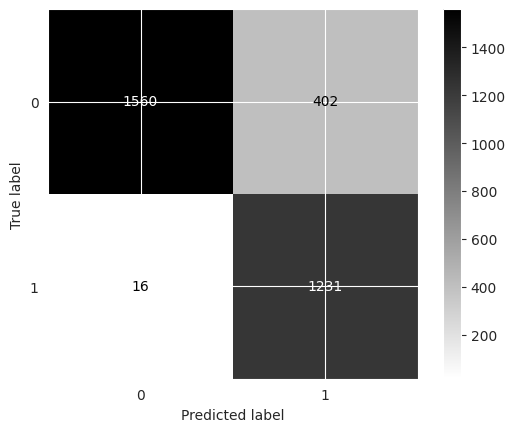

In [45]:
cm = confusion_matrix(y_valid, tree_grid.predict(x_valid))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='binary')
plt.show()

Матрица ошибок дерева

In [47]:
from sklearn.metrics import classification_report

In [55]:
report = classification_report(y_valid, tree_grid.predict(x_valid),
                               target_names=['Low', 'Average or High'])
print('Дерево:')
print(report)

Дерево:
                 precision    recall  f1-score   support

            Low       0.99      0.80      0.88      1962
Average or High       0.75      0.99      0.85      1247

       accuracy                           0.87      3209
      macro avg       0.87      0.89      0.87      3209
   weighted avg       0.90      0.87      0.87      3209



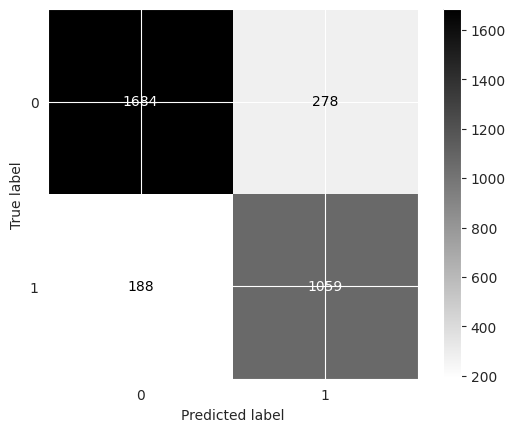

In [46]:
cm = confusion_matrix(y_valid, knn_grid.predict(x_valid))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='binary')
plt.show()

Матрица ошибок knn

In [56]:
report = classification_report(y_valid, knn_grid.predict(x_valid),
                               target_names=['Low', 'Average or High'])
print('knn:')
print(report)

knn:
                 precision    recall  f1-score   support

            Low       0.90      0.86      0.88      1962
Average or High       0.79      0.85      0.82      1247

       accuracy                           0.85      3209
      macro avg       0.85      0.85      0.85      3209
   weighted avg       0.86      0.85      0.86      3209



In [50]:
from sklearn.tree import export_graphviz

In [52]:
export_graphviz(tree_grid.best_estimator_, out_file='customer_tree.dot',
                feature_names=x.columns, filled=True)

In [53]:
import pydot

graphs = pydot.graph_from_dot_file('customer_tree.dot')
graph = graphs[0]

In [54]:
graph.write_png('customer_tree.png')

<img src="customer_tree.png">

Как видно из графиков и значений выше, дерево сработало лучше knn, исходя из
большинства метрик. Это может быть связано с большим количеством столбцов и
необходимостью масштабирования значений. Также можно сделать вывод, что
дерево почти безошибочно определяет покупателей, тратящих средне и выше
среднего. Однако при этом четверть покупателей, определенных как целевые,
оказались покупателями с малыми расходами: с этой задачей knn справился чуть
лучше.